In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import math

TIC = 'TIC 147456499'

In [2]:
search_ffi = lk.search_tesscut(TIC)

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 03,2018,TESScut,1426,TIC 147456499,0.0
1,TESS Sector 30,2020,TESScut,475,TIC 147456499,0.0


In [4]:
search_tpf = lk.search_targetpixelfile(TIC)

In [5]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 03,2018,TESS-SPOC,1800,147456499,0.0
1,TESS Sector 30,2020,TESS-SPOC,600,147456499,0.0


In [6]:
search_lcf = lk.search_lightcurve(TIC)

In [7]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 03,2018,TESS-SPOC,1800,147456499,0.0
1,TESS Sector 03,2018,QLP,1800,147456499,0.0
2,TESS Sector 03,2018,GSFC-ELEANOR-LITE,1800,147456499,0.0
3,TESS Sector 03,2018,TASOC,1800,147456499,0.0
4,TESS Sector 03,2018,TASOC,1800,147456499,0.0
5,TESS Sector 30,2020,TESS-SPOC,600,147456499,0.0
6,TESS Sector 30,2020,QLP,600,147456499,0.0


In [8]:
search_lcf_refined = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

In [9]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 30,2020,TESS-SPOC,600,147456499,0.0


In [10]:
lcf = search_lcf_refined.download_all()

In [11]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 147456499" SECTOR=30 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [12]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2115.895957084152,1.3078695e+03,3.1246791e+00,3.3382331e-03,127934,579.85620,281.04794,9.2682922e+02,2.1917124e+00,6.0211523e+02,8.8852572e-01,1.3078695e+03,3.1246791e+00,0,———,———,———,———,579.85620,1.6084416e-03,281.04794,1.5951860e-03,-1.8934021e-02,9.5686776e-04
2115.9029016933696,1.3033960e+03,3.1270895e+00,3.3384010e-03,127935,579.85781,281.04674,9.2377942e+02,2.1934030e+00,6.0240198e+02,8.8843638e-01,1.3033960e+03,3.1270895e+00,0,———,———,———,———,579.85781,1.6164569e-03,281.04674,1.6026496e-03,-1.6658176e-02,1.9023776e-03
2115.9098463023543,1.3063480e+03,3.1258755e+00,3.3385686e-03,127936,579.85560,281.04540,9.2580872e+02,2.1925514e+00,6.0339362e+02,8.8791788e-01,1.3063480e+03,3.1258755e+00,0,———,———,———,———,579.85560,1.6107630e-03,281.04540,1.5983311e-03,-1.5674768e-02,2.1720901e-03
2115.91679091134,1.3034999e+03,3.1220787e+00,3.3387362e-03,127937,579.85827,281.04576,9.2366827e+02,2.1898882e+00,6.0216406e+02,8.8626587e-01,1.3034999e+03,3.1220787e+00,0,———,———,———,———,579.85827,1.6137045e-03,281.04576,1.6004661e-03,-1.3970341e-02,2.2767228e-03
2115.923735519859,1.3009805e+03,3.1207850e+00,3.3389034e-03,127938,579.85512,281.04674,9.2161975e+02,2.1889808e+00,6.0318939e+02,8.8637578e-01,1.3009805e+03,3.1207850e+00,0,———,———,———,———,579.85512,1.6156737e-03,281.04674,1.6033022e-03,-1.4733861e-02,2.2035320e-03
2115.930680128145,1.3033745e+03,3.1228988e+00,3.3390704e-03,127939,579.86288,281.04546,9.2299109e+02,2.1904633e+00,6.0360620e+02,8.8708562e-01,1.3033745e+03,3.1228988e+00,0,———,———,———,———,579.86288,1.6150232e-03,281.04546,1.6024249e-03,-1.2845621e-02,3.4723170e-03
2115.951513952073,1.2972451e+03,3.1179159e+00,3.3395702e-03,127942,579.86007,281.04583,9.1813373e+02,2.1869686e+00,6.0321808e+02,8.8652420e-01,1.2972451e+03,3.1179159e+00,0,———,———,———,———,579.86007,1.6209000e-03,281.04583,1.6078954e-03,-1.2903785e-02,4.9852498e-04
2115.9584585594275,1.3066946e+03,3.1228902e+00,3.3397363e-03,127943,579.85895,281.04678,9.2474518e+02,2.1904576e+00,6.0395709e+02,8.8669366e-01,1.3066946e+03,3.1228902e+00,0,———,———,———,———,579.85895,1.6133400e-03,281.04678,1.6004259e-03,-1.2478964e-02,3.6751928e-03


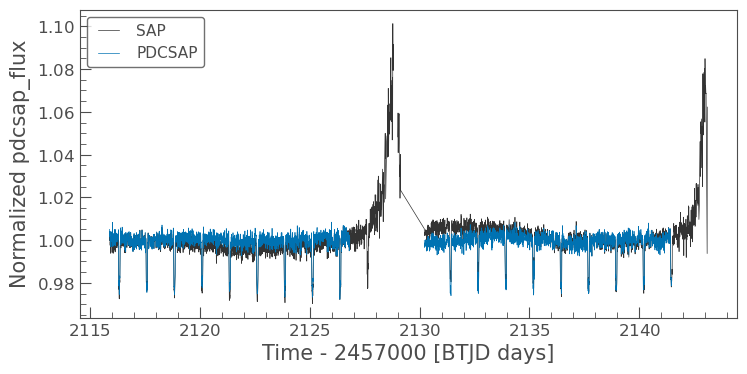

In [13]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 147456499')

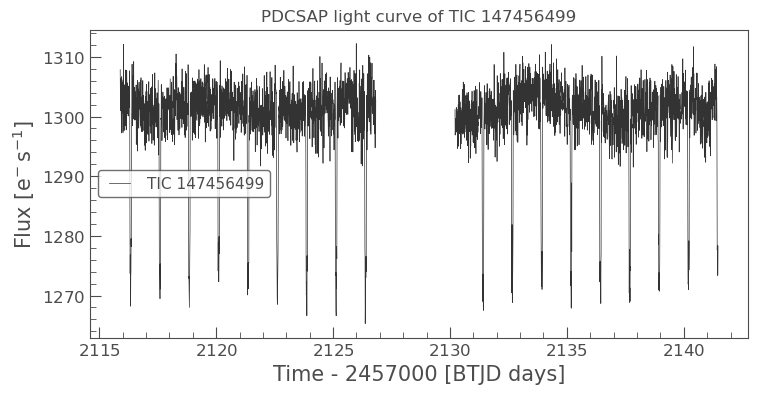

In [14]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 147456499")

In [15]:
flat_lc = lcf[0].flatten(window_length=401)
folded_lc = flat_lc.fold(period=1.256928569285693076)
binned_lc = folded_lc.bin(time_bin_size=0.01)

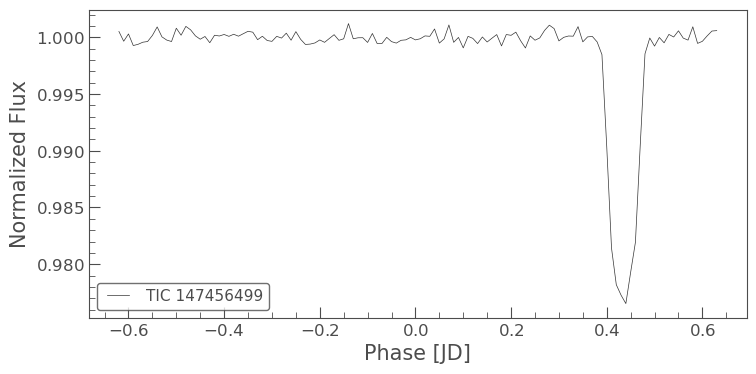

In [16]:
lcf[0].flatten(window_length=401).fold(period=1.256928569285693076).bin(time_bin_size=0.01).plot();

In [17]:
lcf[0].interact_bls()

In [18]:
ffi_data = search_ffi[1].download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 147456499, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

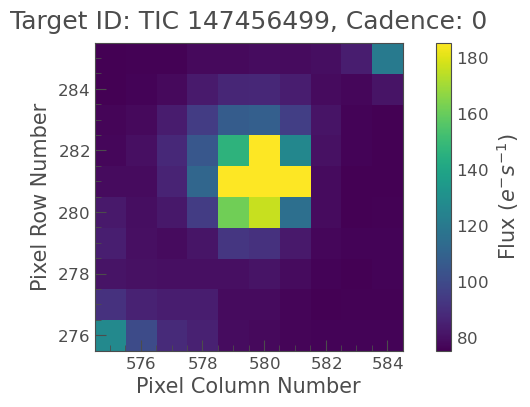

In [19]:
ffi_data.plot()

In [20]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

5

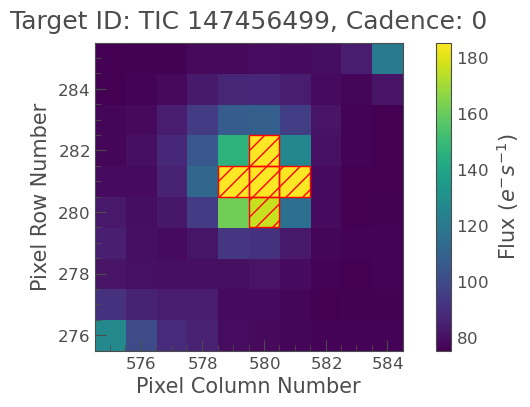

In [21]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [22]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [23]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
2115.8961935436937,1095.5748291015625,1.679300308227539,579.9753836623473,281.0081222049284,0,0
2115.9031381971495,1094.4527587890625,1.6812783479690552,579.9771588863049,281.0085939898884,1,0
2115.9100828501387,1095.49072265625,1.6808171272277832,579.9750755076185,281.0072330336986,2,0
2115.9170275031292,1093.330810546875,1.6783748865127563,579.9773224470182,281.0076669730341,3,0
2115.923972155654,1092.5418701171875,1.6777020692825317,579.9762601894079,281.00857076728613,4,0
2115.9309168081772,1095.0421142578125,1.6795457601547241,579.9780731830756,281.0063694981988,5,0
2115.951750763888,1089.9521484375,1.6757137775421143,579.977630697126,281.0072527788455,6,0
2115.95869541548,1093.669677734375,1.678090214729309,579.9784514030159,281.00768909703413,7,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

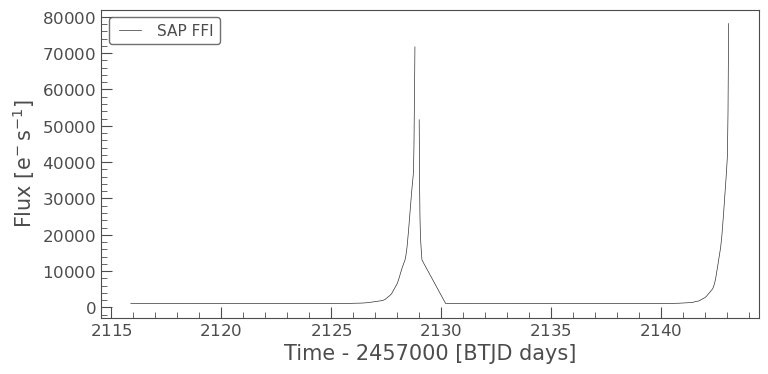

In [24]:
ffi_lc.plot(label="SAP FFI")

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1128: LightkurveWarning: The light curve appears to be zero-centered (median=1.09e+03 electron / s +/- 5.45e+03 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

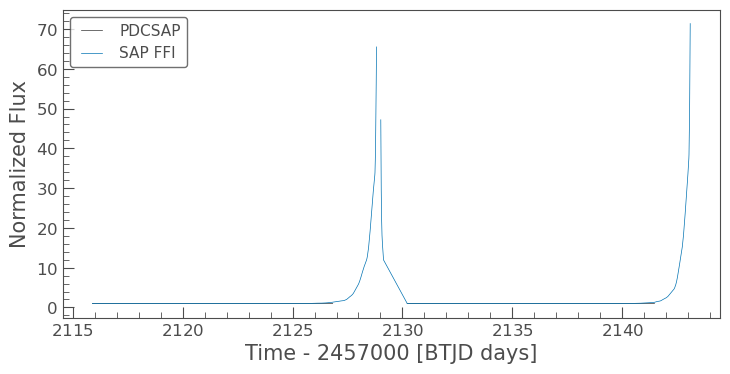

In [25]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [26]:
ffi_data.interact()

In [27]:
ffi_data.interact_sky()

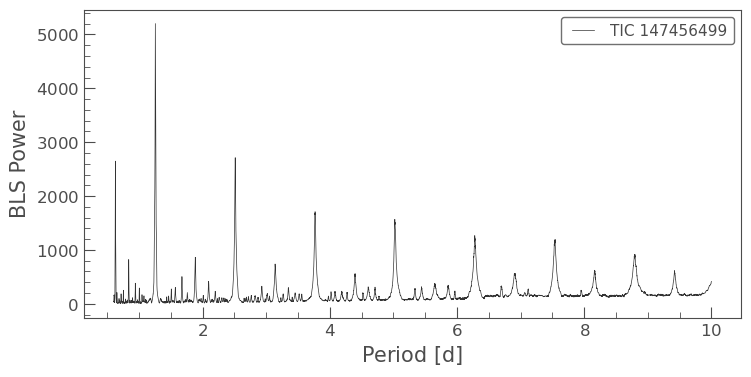

In [28]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [29]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 1.256 d


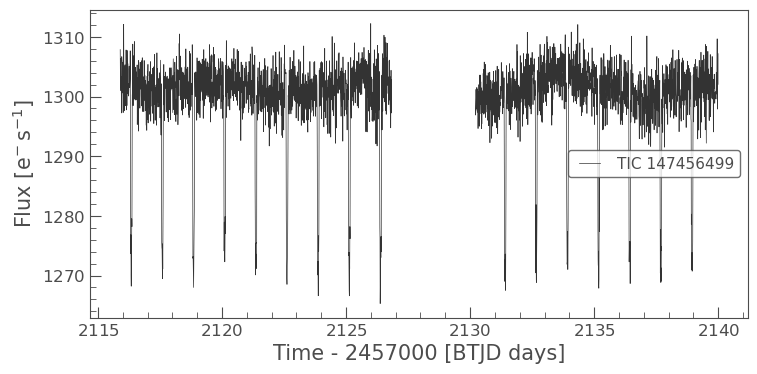

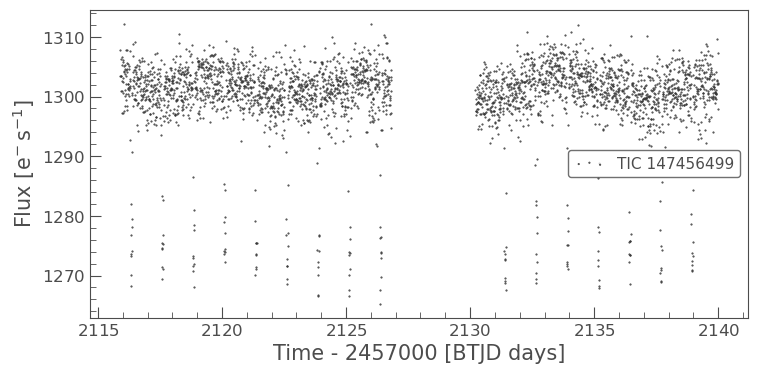

In [30]:
mask = ((lcf[0].time.value < 2140)&(lcf[0].time.value > 2115))
masked_lc=lcf[0][mask];
masked_lc.plot();
masked_lc.scatter(s=1);

In [31]:
# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

(0.0, 4786.695952)

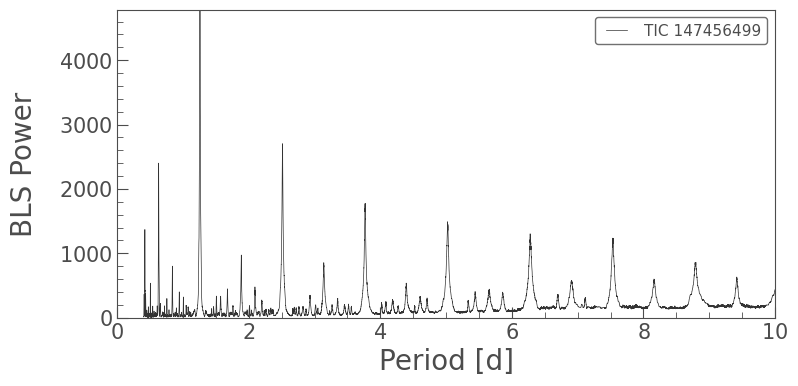

In [32]:
# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 10)
plt.ylim([0, 4786.695952])

In [33]:
# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

In [34]:
# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

Period at 1th max power = 1.256928569285693076 d
BLS max power = 4786.695952
Epoch max power = 2459116.330957
----------------------------------------
Period at 2th max power = 1.256040560405604189 d
BLS max power = 4757.165200
Epoch max power = 2459116.335957
----------------------------------------
Period at 3th max power = 1.256632566325663447 d
BLS max power = 4688.203219
Epoch max power = 2459116.330957
----------------------------------------
Period at 4th max power = 1.255448554485544932 d
BLS max power = 4683.241969
Epoch max power = 2459116.340957
----------------------------------------
Period at 5th max power = 1.255744557445574561 d
BLS max power = 4675.543317
Epoch max power = 2459116.340957
----------------------------------------
Period at 6th max power = 1.256336563365633818 d
BLS max power = 4660.449377
Epoch max power = 2459116.330957
----------------------------------------
Period at 7th max power = 1.255152551525515303 d
BLS max power = 4638.179168
Epoch max power =

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(1265.0, 1310.0)

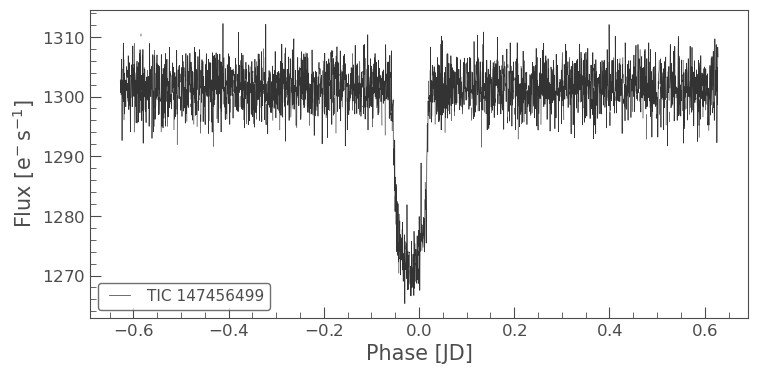

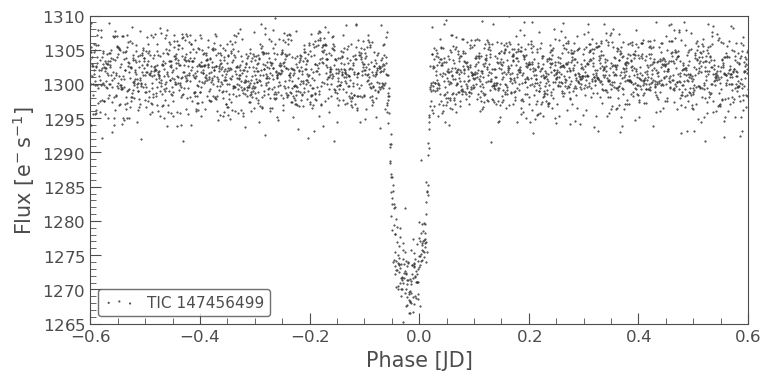

In [35]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 1.256928569285693076
epochtime = 2459116.330957
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.6,0.6)
plt.ylim([1265,1310])

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(1260.0, 1310.0)

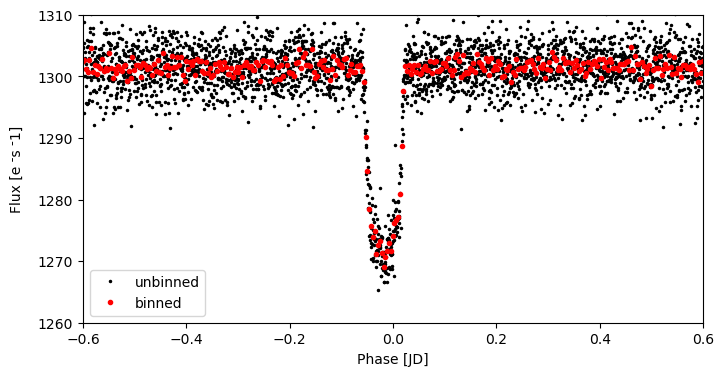

In [36]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.6,0.6)
plt.ylim([1260,1310])

In [37]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  1268.9925537109375 electron / s
median flux = 1301.425537109375 electron / s
Tdepth =  32.4329833984375 electron / s
Tdepth in ppm =  32432983.3984375 electron / s ppm
Rp/Rs ratio =  5.694996347535045 electron(1/2) / s(1/2)


In [38]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [39]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 1.2000000000000002 d hours


In [40]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  27.98673052532516 electron / s
depth in ppm = 27986730.52532516 electron / s ppm


In [41]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

1.256928569285693 d
2116.330957084152
0.05 d


In [42]:
P = 1.256928569285693076 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 0.81 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 3178530642.7373886 m
a = 3178530.6427373886 km
a = 0.021247164613543992 AU
The planetary mass was neglected


In [43]:
L = 0.4371297 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 0.6303892736743197 AU
The outer boundary of the habitable zone ro = 0.9081701486329115 AU


In [44]:
Rs = 0.907756 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 3599845.991514818 electron(1/2) / s(1/2) km
Rp= 565.0362567124184 electron(1/2) / s(1/2) Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 5.0284707855794775


In [45]:
P = 1.256928569285693076 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 311782.35187677806 m/s


In [46]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  1.256928569285693 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  1.2000000000000002 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  32.4329833984375 electron / s
Transit depth in ppm =  32432983.3984375 electron / s ppm
Transit Depth from bls model in ppm = 27986730.52532516 electron / s ppm
Rp/Rs ratio =  5.694996347535045 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 3599845.991514818 electron(1/2) / s(1/2) km
Rp= 565.0362567124184 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 5.0284707855794775
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 311782.35187677806 m/s
- - - - - - - - - - - - - - - - - - - - 


In [47]:
lk.show_citation_instructions()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
